# Sahil Sheikh
## CWID: A20518693
## Subject:CS 577
## Semester: FALL 22
## ASSIGNMENT 4

In [2]:
import pandas as pd
import tensorflow as tf
import keras
import numpy as np
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Link for dataset
https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

Q1.(a)

In [3]:
import os
train_path = 'C:/Users/sahil/Downloads/kagglecatsanddogs_5340_data/PetImages/train'
vali_path = 'C:/Users/sahil/Downloads/kagglecatsanddogs_5340_data/PetImages/validation'
test_path = 'C:/Users/sahil/Downloads/kagglecatsanddogs_5340_data/PetImages/test'

Since the data file only consist of 2 folders cats and dog,

rather then having the reuired structre(layout) :

data/

data/train/cats

data/train/dogs

data/validation/cats

data/validation/dogs

data/test/cats

data/test/dogs

I'll make changes to the data to get the required layout as if i use only one generator and split it later i might lose marks.

(b)

In [4]:
from keras.preprocessing.image import ImageDataGenerator
test_dg = ImageDataGenerator(rescale = 1./255)
train_dg = ImageDataGenerator(rescale = 1./255)
vali_dg = ImageDataGenerator(rescale = 1./255)

The 3 generators which create a training set of 3200 images, 400 validation images and 400 test images. The size of these images is 200x200x3.

In [5]:
train_g = train_dg.flow_from_directory(train_path,target_size=(150,150),batch_size=20,class_mode='binary')

Found 3200 images belonging to 2 classes.


In [6]:
test_g = test_dg.flow_from_directory(test_path,target_size=(150,150),batch_size=20,class_mode='binary')

Found 400 images belonging to 2 classes.


In [7]:
vali_g = vali_dg.flow_from_directory(vali_path,target_size=(150,150),batch_size=20,class_mode='binary')

Found 400 images belonging to 2 classes.


Calculating length of generators to set step_per_epoch and validation_steps

for training : batch_size:20, smaples:3200, steps = 160

for vali & test:: batch = 20, samples:400, steps = 20

In [7]:
len(train_g)

160

In [8]:
len(vali_g)

20

(c)
Creating our CNN model :
first layer : 32 filters, kernel size: 3x3, stride =1 
second layer : 64 filter, ""                        
max pooling :  2x2, 
second layer : 128 filter, ""  

def cat_dog_model():
    model = tf.keras.Sequential([
        keras.layers.Conv2D(32,(3,3),activation='relu',padding='valid',input_shape=(200,200,3)),
        keras.layers.Conv2D(64,(3,3),activation='relu',padding='valid'),
        keras.layers.MaxPooling2D(2,2),
        keras.layers.Conv2D(128,(3,3),activation='relu',padding='valid'),
        keras.layers.MaxPooling2D(2,2),
        keras.layers.Flatten(),
        keras.layers.Dense(99,activation='relu'),
        keras.layers.Dense(1,activation='sigmoid')        
    ])
    model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics =['accuracy'] )
    return model
    

model_1 = cat_dog_model()
history = model_1.fit_generator(train_g,steps_per_epoch=32,epochs=20,validation_data=vali_g,validation_steps=10)
acc = history.history['acc']
loss = history.history['loss']
val_acc =history.history['val_acc']
val_loss =history.history['val_loss']
epochs=(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='training acc')
plt.plot(epochs,val_acc,'b',label='validation acc')
plt.title('Training and validation acc')
plt.legend()
plt.show()
plt.plot(epochs,loss,'bo',label='training loss')
plt.plot(epochs,val_loss,'b',label='validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

After running the above code I received a error:OOM means out of memory. I made our model without padding, which resulted in me running out of memory so I'll make a new model this time usinging padding to avoid this

New model with padding='same' 

In [9]:
def cat_dog_model():
    model = tf.keras.Sequential([
        keras.layers.Conv2D(32,(3,3),activation='relu',padding='same',input_shape=(150,150,3)),
        keras.layers.Conv2D(64,(3,3),activation='relu',padding='same'),
        keras.layers.MaxPooling2D(2,2),
        keras.layers.Conv2D(128,(3,3),activation='relu',padding='same'),
        keras.layers.Flatten(),
        keras.layers.Dense(1,activation='sigmoid')        
    ])
    model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics =['accuracy'] )
    return model
 

Epoch 1/10
160/160 [==============================] - 8s 45ms/step - loss: 0.7783 - accuracy: 0.5500 - val_loss: 0.6836 - val_accuracy: 0.6325
Epoch 2/10
160/160 [==============================] - 7s 41ms/step - loss: 0.6489 - accuracy: 0.6478 - val_loss: 0.7009 - val_accuracy: 0.6100
Epoch 3/10
160/160 [==============================] - 7s 41ms/step - loss: 0.5596 - accuracy: 0.7203 - val_loss: 0.6814 - val_accuracy: 0.6375
Epoch 4/10
160/160 [==============================] - 6s 40ms/step - loss: 0.4321 - accuracy: 0.7987 - val_loss: 0.7853 - val_accuracy: 0.6250
Epoch 5/10
160/160 [==============================] - 7s 41ms/step - loss: 0.2791 - accuracy: 0.8766 - val_loss: 1.0653 - val_accuracy: 0.6175
Epoch 6/10
160/160 [==============================] - 7s 41ms/step - loss: 0.1225 - accuracy: 0.9553 - val_loss: 1.7105 - val_accuracy: 0.6225
Epoch 7/10
160/160 [==============================] - 7s 41ms/step - loss: 0.0634 - accuracy: 0.9834 - val_loss: 2.0262 - val_accuracy: 0.6200

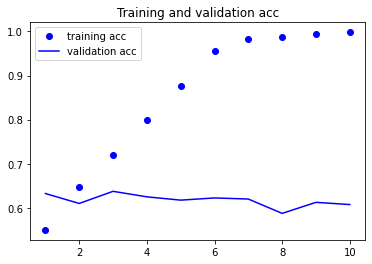

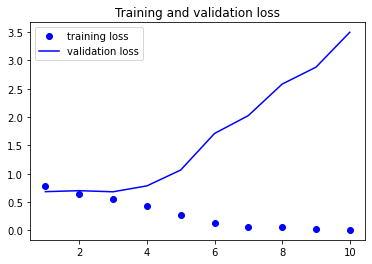

In [16]:
model_1 = cat_dog_model()
history = model_1.fit(train_g,steps_per_epoch=len(train_g),epochs=10,validation_data=vali_g,validation_steps=len(vali_g))
acc = history.history['accuracy']
loss = history.history['loss']
val_acc =history.history['val_accuracy']
val_loss =history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='training acc')
plt.plot(epochs,val_acc,'b',label='validation acc')
plt.title('Training and validation acc')
plt.legend()
plt.show()
plt.plot(epochs,loss,'bo',label='training loss')
plt.plot(epochs,val_loss,'b',label='validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

(d)

Found 3600 images belonging to 2 classes.
Epoch 1/10
180/180 [==============================] - 7s 37ms/step - loss: 0.6908 - accuracy: 0.5575
Epoch 2/10
180/180 [==============================] - 7s 37ms/step - loss: 0.6262 - accuracy: 0.6531
Epoch 3/10
180/180 [==============================] - 6s 36ms/step - loss: 0.4979 - accuracy: 0.7564
Epoch 4/10
180/180 [==============================] - 7s 36ms/step - loss: 0.3485 - accuracy: 0.8544
Epoch 5/10
180/180 [==============================] - 7s 37ms/step - loss: 0.1963 - accuracy: 0.9258
Epoch 6/10
180/180 [==============================] - 6s 36ms/step - loss: 0.0890 - accuracy: 0.9722
Epoch 7/10
180/180 [==============================] - 7s 36ms/step - loss: 0.0377 - accuracy: 0.9872
Epoch 8/10
180/180 [==============================] - 7s 36ms/step - loss: 0.0112 - accuracy: 0.9969
Epoch 9/10
180/180 [==============================] - 7s 36ms/step - loss: 0.0139 - accuracy: 0.9969
Epoch 10/10
180/180 [============================

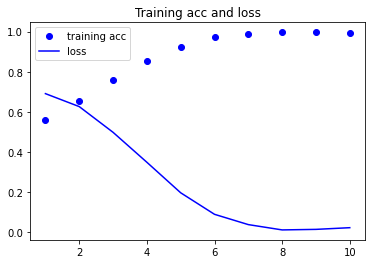

20/20 [==============================] - 1s 43ms/step - loss: 1.9176 - accuracy: 0.6275


[1.9176138639450073, 0.6274999976158142]

In [42]:
all_data = 'C:/Users/sahil/Downloads/kagglecatsanddogs_5340_data/PetImages/final_data'
data_dg = ImageDataGenerator(rescale = 1./255)
data_g = data_dg.flow_from_directory(all_data,target_size=(150,150),batch_size=20,class_mode='binary')
f_model = cat_dog_model()
history = f_model.fit(data_g,steps_per_epoch=len(data_g),epochs=10)
f_model.save("final_model.h5")
f_model.save_weights("final_model_weights.h5")
acc = history.history['accuracy']
loss = history.history['loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='training acc')
plt.plot(epochs,loss,'b',label='loss')
plt.title('Training acc and loss')
plt.legend()
plt.show()
f_model.evaluate(test_g)

After training the model on entire training data(train+validation) we evaluate the model on test generator 

In [38]:
from keras.models import load_model
new_model = load_model("final_model.h5")
new_model.summary()
imgpath = 'C:/Users/sahil/Downloads/kagglecatsanddogs_5340/PetImages/Cat/3012.jpg'

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 conv2d_32 (Conv2D)          (None, 150, 150, 64)      18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 75, 75, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 75, 75, 128)       73856     
                                                                 
 flatten_7 (Flatten)         (None, 720000)            0         
                                                                 
 dense_10 (Dense)            (None, 1)                 720001    
                                                      

(e)

In [40]:
img = image.load_img(imgpath, target_size=(150,150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor,axis=0)
img_tensor /=255
print(img_tensor.shape)


(1, 150, 150, 3)


In [44]:
from keras import models
layer_op = [layer.output for layer in new_model.layers[:4]]
activation_m = models.Model(inputs=new_model.input, outputs=layer_op)
activations = activation_m.predict(img_tensor)
first_layer = activations[0]
print(first_layer.shape)

1/1 [==============================] - 1s 526ms/step
(1, 150, 150, 32)


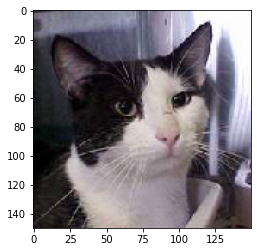

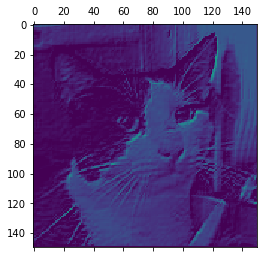

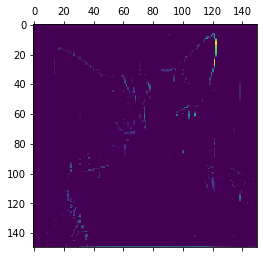

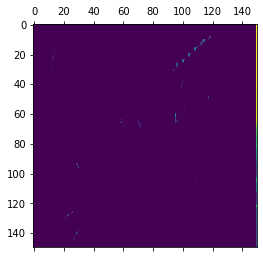

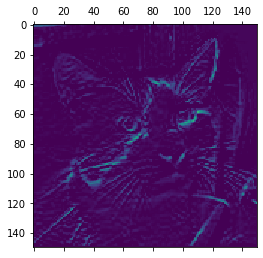

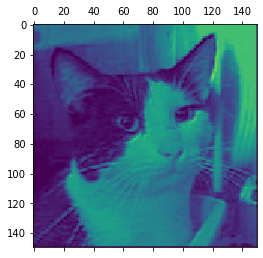

In [50]:
plt.imshow(img_tensor[0])
plt.show()
plt.matshow(first_layer[0,:,:,12],cmap="viridis")
plt.matshow(first_layer[0,:,:,18],cmap="viridis")
plt.matshow(first_layer[0,:,:,20],cmap="viridis")
plt.matshow(first_layer[0,:,:,24],cmap="viridis")
plt.matshow(first_layer[0,:,:,30],cmap="viridis")


(1, 150, 150, 64)


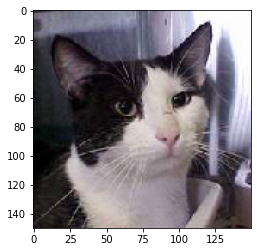

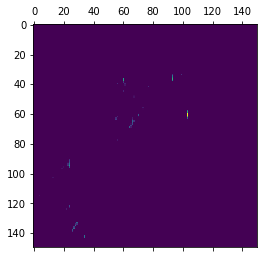

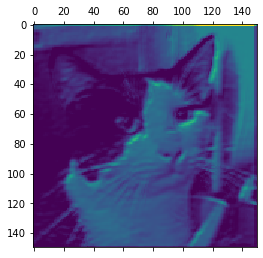

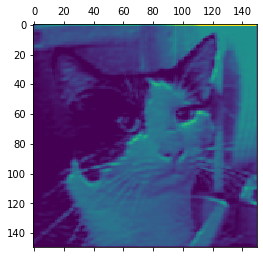

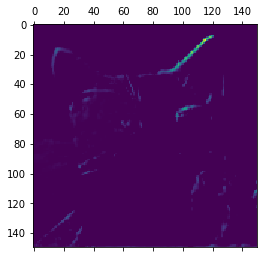

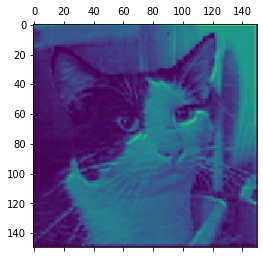

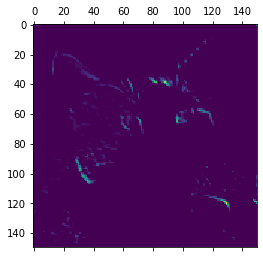

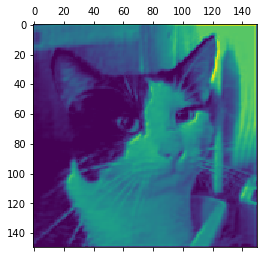

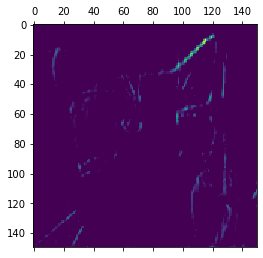

In [52]:
second_layer = activations[1]
print(second_layer.shape)
plt.imshow(img_tensor[0])
plt.show()
plt.matshow(second_layer[0,:,:,2],cmap="viridis")
plt.matshow(second_layer[0,:,:,12],cmap="viridis")
plt.matshow(second_layer[0,:,:,20],cmap="viridis")
plt.matshow(second_layer[0,:,:,30],cmap="viridis")
plt.matshow(second_layer[0,:,:,40],cmap="viridis")
plt.matshow(second_layer[0,:,:,50],cmap="viridis")
plt.matshow(second_layer[0,:,:,55],cmap="viridis")
plt.matshow(second_layer[0,:,:,60],cmap="viridis")


(1, 75, 75, 128)


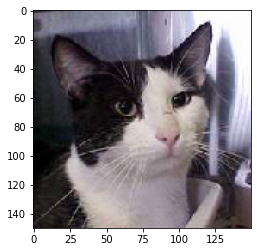

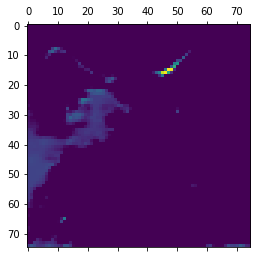

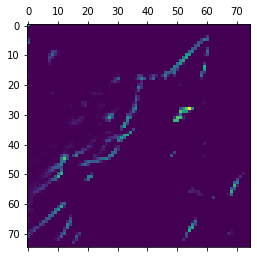

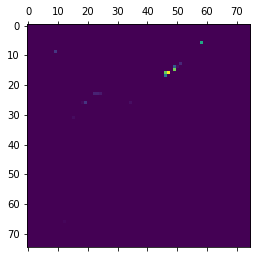

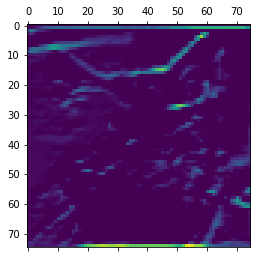

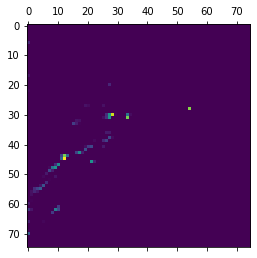

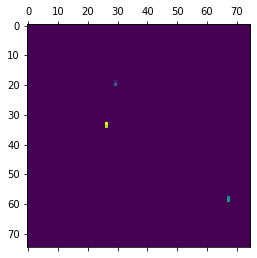

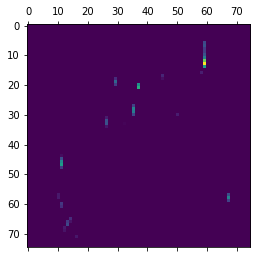

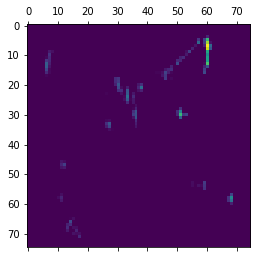

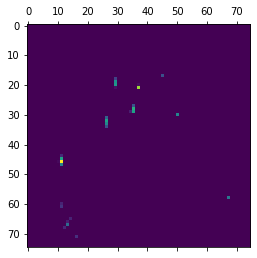

In [69]:
fourth = activations[3]
print(fourth.shape)
plt.imshow(img_tensor[0])
plt.show()
plt.matshow(fourth[0,:,:,12],cmap="viridis")
plt.matshow(fourth[0,:,:,22],cmap="viridis")
plt.matshow(fourth[0,:,:,30],cmap="viridis")
plt.matshow(fourth[0,:,:,38],cmap="viridis")
plt.matshow(fourth[0,:,:,40],cmap="viridis")
plt.matshow(fourth[0,:,:,44],cmap="viridis")
plt.matshow(fourth[0,:,:,50],cmap="viridis")
plt.matshow(fourth[0,:,:,60],cmap="viridis")
plt.matshow(fourth[0,:,:,80],cmap="viridis")


(f)

(1, 150, 150, 32)
(1, 150, 150, 64)
(1, 75, 75, 64)
(1, 75, 75, 128)


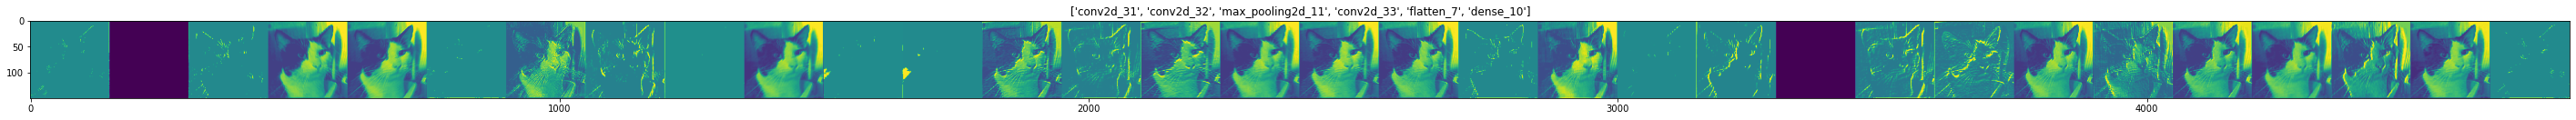

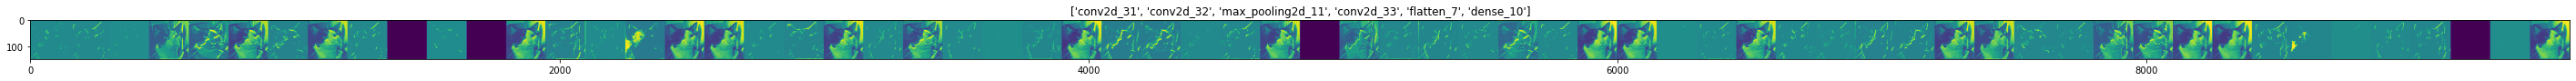

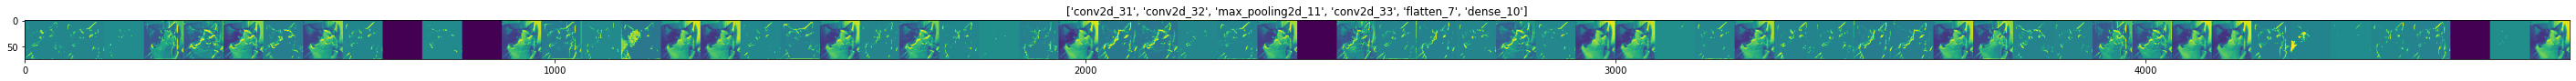

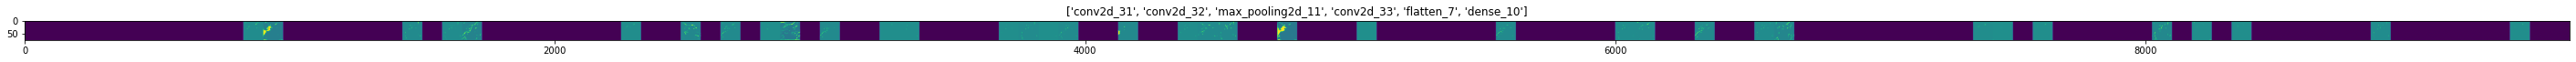

In [99]:
layer_names = [layer.name for layer in new_model.layers]
for layer_name, feature_map in zip(layer_names, activations):
    print(feature_map.shape)
    n_features = feature_map.shape[-1]
    size= feature_map.shape[ 1]
    display_grid = np.zeros((size, size * n_features))
    # Postprocess the feature to be visually palatable
    for i in range(n_features):
        imgx  = feature_map[0, :, :, i]
        imgx -= imgx.mean()
        imgx /= imgx.std ()
        imgx *=  64
        imgx += 128
        imgx  = np.clip(imgx, 0, 255).astype('uint8')
      # Tile each filter into a horizontal grid
        display_grid[:, i * size : (i + 1) * size] = imgx
# Display the grid
    scale = 50. / n_features
    plt.figure(figsize=(scale * n_features, scale) )
    plt.title (layer_names)
    plt.grid  (False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')


(g)

In [11]:
from keras.applications import VGG16
from keras.models import Model


In [105]:
vgg_model = vgg_base.output

In [18]:
def vgg_model_untrain():
    vgg_base=VGG16(weights='imagenet',
                include_top=False,
                input_shape=(150,150,3))
    for layer in vgg_base.layers:
            layer.trainable = False
    nw_model = vgg_base.output
    nw_model = keras.layers.Flatten(name='flatten')(nw_model)
    nw_model = keras.layers.Dense(128, activation='relu')(nw_model)
    output_layer = keras.layers.Dense(1,activation='sigmoid')(nw_model)
    model = Model(inputs=vgg_base.input, outputs=output_layer)
    model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics =['accuracy'] )
    return model

In [9]:
def vgg_model_train():
    vgg_base=VGG16(weights='imagenet',
                include_top=False,
                input_shape=(150,150,3))
    for layer in vgg_base.layers:
            layer.trainable = True
    nw_model = vgg_base.output
    nw_model = keras.layers.Flatten(name='flatten')(nw_model)
    nw_model = keras.layers.Dense(128, activation='relu')(nw_model)
    output_layer = keras.layers.Dense(1,activation='sigmoid')(nw_model)
    model = Model(inputs=vgg_base.input, outputs=output_layer)
    model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics =['accuracy'] )
    return model

In [12]:
vgg_model1 = vgg_model_train()
vgg_model2 = vgg_model_untrain()

(g),(h),(i)

In [132]:
data_aug=ImageDataGenerator(rescale=1./255,
                            rotation_range=40,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            fill_mode='nearest')
train_aug=data_aug.flow_from_directory(train_path,target_size=(150,150),batch_size=20,class_mode='binary')


Found 3200 images belonging to 2 classes.


In [137]:
vgg_model_train = vgg_model_train()
vgg_model_un = vgg_model_untrain()

Epoch 1/10
160/160 [==============================] - 8s 44ms/step - loss: 0.3317 - accuracy: 0.8556 - val_loss: 0.2400 - val_accuracy: 0.9050
Epoch 2/10
160/160 [==============================] - 7s 42ms/step - loss: 0.1665 - accuracy: 0.9388 - val_loss: 0.2455 - val_accuracy: 0.8775
Epoch 3/10
160/160 [==============================] - 7s 43ms/step - loss: 0.1204 - accuracy: 0.9528 - val_loss: 0.2695 - val_accuracy: 0.8900
Epoch 4/10
160/160 [==============================] - 7s 43ms/step - loss: 0.0897 - accuracy: 0.9659 - val_loss: 0.3369 - val_accuracy: 0.8500
Epoch 5/10
160/160 [==============================] - 7s 43ms/step - loss: 0.0674 - accuracy: 0.9734 - val_loss: 0.3307 - val_accuracy: 0.8925
Epoch 6/10
160/160 [==============================] - 7s 43ms/step - loss: 0.0259 - accuracy: 0.9959 - val_loss: 0.3619 - val_accuracy: 0.8850
Epoch 7/10
160/160 [==============================] - 7s 43ms/step - loss: 0.0170 - accuracy: 0.9975 - val_loss: 0.3463 - val_accuracy: 0.8825

C:\Users\sahil\AppData\Local\Temp\ipykernel_23600\3380948426.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs,acc,'b',label='training acc',color="green")


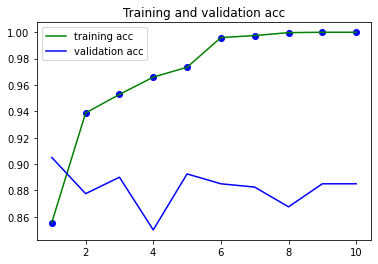

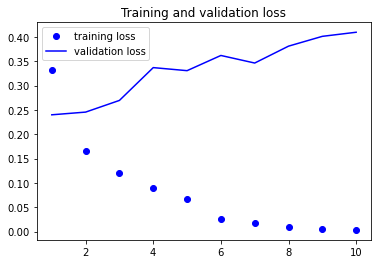

In [139]:
history = vgg_model_un.fit(train_g,steps_per_epoch=len(train_g),epochs=10,validation_data=vali_g,validation_steps=len(vali_g))
acc = history.history['accuracy']
loss = history.history['loss']
val_acc=history.history['val_accuracy']
val_loss =history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo')
plt.plot(epochs,acc,'b',label='training acc',color="green")
plt.plot(epochs,val_acc,'b',label='validation acc')
plt.title('Training and validation acc')
plt.legend()
plt.show()
plt.plot(epochs,loss,'bo',label='training loss')
plt.plot(epochs,val_loss,'b',label='validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Epoch 1/10
160/160 [==============================] - 21s 125ms/step - loss: 0.7388 - accuracy: 0.5581 - val_loss: 0.8740 - val_accuracy: 0.5300
Epoch 2/10
160/160 [==============================] - 20s 122ms/step - loss: 0.6755 - accuracy: 0.5956 - val_loss: 0.6578 - val_accuracy: 0.6075
Epoch 3/10
160/160 [==============================] - 20s 122ms/step - loss: 0.6179 - accuracy: 0.6628 - val_loss: 0.6863 - val_accuracy: 0.5800
Epoch 4/10
160/160 [==============================] - 20s 122ms/step - loss: 0.6225 - accuracy: 0.6625 - val_loss: 0.6596 - val_accuracy: 0.5675
Epoch 5/10
160/160 [==============================] - 20s 122ms/step - loss: 0.6790 - accuracy: 0.6012 - val_loss: 0.7291 - val_accuracy: 0.5000
Epoch 6/10
160/160 [==============================] - 20s 122ms/step - loss: 0.6926 - accuracy: 0.5387 - val_loss: 0.6394 - val_accuracy: 0.6575
Epoch 7/10
160/160 [==============================] - 20s 122ms/step - loss: 0.7016 - accuracy: 0.5088 - val_loss: 0.6931 - val_ac

C:\Users\sahil\AppData\Local\Temp\ipykernel_23600\2560457768.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs,acc,'b',label='training acc',color="green")


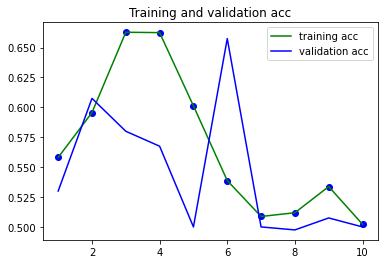

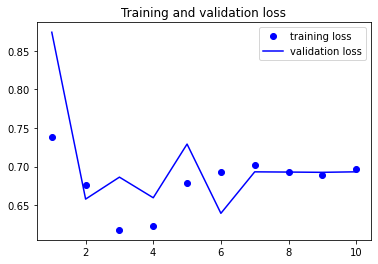

In [138]:
history = vgg_model_train.fit(train_g,steps_per_epoch=len(train_g),epochs=10,validation_data=vali_g,validation_steps=len(vali_g))
acc = history.history['accuracy']
loss = history.history['loss']
val_acc=history.history['val_accuracy']
val_loss =history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo')
plt.plot(epochs,acc,'b',label='training acc',color="green")
plt.plot(epochs,val_acc,'b',label='validation acc')
plt.title('Training and validation acc')
plt.legend()
plt.show()
plt.plot(epochs,loss,'bo',label='training loss')
plt.plot(epochs,val_loss,'b',label='validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Epoch 1/10
160/160 [==============================] - 31s 115ms/step - loss: 1.0489 - accuracy: 0.5109
Epoch 2/10
160/160 [==============================] - 18s 115ms/step - loss: 0.6933 - accuracy: 0.4969
Epoch 3/10
160/160 [==============================] - 19s 116ms/step - loss: 0.6933 - accuracy: 0.5075
Epoch 4/10
160/160 [==============================] - 19s 116ms/step - loss: 0.6932 - accuracy: 0.4953
Epoch 5/10
160/160 [==============================] - 19s 116ms/step - loss: 0.6932 - accuracy: 0.5003
Epoch 6/10
160/160 [==============================] - 19s 116ms/step - loss: 0.6932 - accuracy: 0.4741
Epoch 7/10
160/160 [==============================] - 19s 116ms/step - loss: 0.6932 - accuracy: 0.4988
Epoch 8/10
160/160 [==============================] - 19s 116ms/step - loss: 0.6932 - accuracy: 0.4938
Epoch 9/10
160/160 [==============================] - 19s 117ms/step - loss: 0.6932 - accuracy: 0.4969
Epoch 10/10
160/160 [==============================] - 19s 116ms/step - l

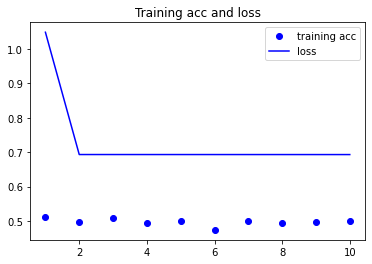

20/20 [==============================] - 1s 49ms/step - loss: 0.6931 - accuracy: 0.5000


[0.6931479573249817, 0.5]

In [16]:
vgg_train_model = vgg_model_train()
history = vgg_train_model.fit(data_g,steps_per_epoch=len(train_g),epochs=10)
vgg_train_model.save("vgg_train_model.h5")
vgg_train_model.save_weights("vgg_train_model_weights.h5")
acc = history.history['accuracy']
loss = history.history['loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='training acc')
plt.plot(epochs,loss,'b',label='loss')
plt.title('Training acc and loss')
plt.legend()
plt.show()
vgg_train_model.evaluate(test_g)

Epoch 1/10
160/160 [==============================] - 7s 38ms/step - loss: 0.4058 - accuracy: 0.8291
Epoch 2/10
160/160 [==============================] - 6s 38ms/step - loss: 0.2241 - accuracy: 0.9031
Epoch 3/10
160/160 [==============================] - 6s 38ms/step - loss: 0.1690 - accuracy: 0.9328
Epoch 4/10
160/160 [==============================] - 6s 38ms/step - loss: 0.1318 - accuracy: 0.9516
Epoch 5/10
160/160 [==============================] - 6s 38ms/step - loss: 0.1009 - accuracy: 0.9634
Epoch 6/10
160/160 [==============================] - 6s 38ms/step - loss: 0.0810 - accuracy: 0.9712
Epoch 7/10
160/160 [==============================] - 6s 38ms/step - loss: 0.0598 - accuracy: 0.9828
Epoch 8/10
160/160 [==============================] - 6s 38ms/step - loss: 0.0422 - accuracy: 0.9909
Epoch 9/10
160/160 [==============================] - 6s 38ms/step - loss: 0.0314 - accuracy: 0.9959
Epoch 10/10
160/160 [==============================] - 6s 38ms/step - loss: 0.0262 - accura

C:\Users\sahil\AppData\Local\Temp\ipykernel_2984\3647390296.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs,acc,'b',label='training acc',color="green")


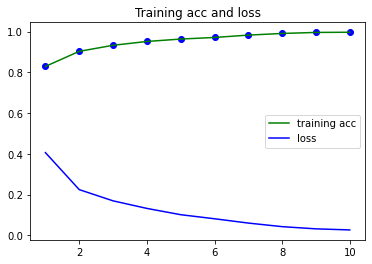

20/20 [==============================] - 1s 37ms/step - loss: 0.2760 - accuracy: 0.8925


[0.2760259807109833, 0.8924999833106995]

In [19]:
vgg_untrain_model = vgg_model_untrain()
history = vgg_untrain_model.fit(data_g,steps_per_epoch=len(train_g),epochs=10)
vgg_untrain_model.save("vgg_untrain_model.h5")
vgg_untrain_model.save_weights("vgg_untrain_model_weights.h5")
acc = history.history['accuracy']
loss = history.history['loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo')
plt.plot(epochs,acc,'b',label='training acc',color="green")
plt.plot(epochs,loss,'b',label='loss')
plt.title('Training acc and loss')
plt.legend()
plt.show()
vgg_untrain_model.evaluate(test_g)

Epoch 1/10
160/160 [==============================] - 15s 94ms/step - loss: 0.4326 - accuracy: 0.8056 - val_loss: 0.2679 - val_accuracy: 0.8750
Epoch 2/10
160/160 [==============================] - 15s 95ms/step - loss: 0.3539 - accuracy: 0.8344 - val_loss: 0.2515 - val_accuracy: 0.8975
Epoch 3/10
160/160 [==============================] - 15s 91ms/step - loss: 0.3181 - accuracy: 0.8625 - val_loss: 0.2958 - val_accuracy: 0.8700
Epoch 4/10
160/160 [==============================] - 15s 91ms/step - loss: 0.3108 - accuracy: 0.8684 - val_loss: 0.2614 - val_accuracy: 0.9000
Epoch 5/10
160/160 [==============================] - 15s 92ms/step - loss: 0.3038 - accuracy: 0.8756 - val_loss: 0.2903 - val_accuracy: 0.8725
Epoch 6/10
160/160 [==============================] - 15s 93ms/step - loss: 0.2879 - accuracy: 0.8716 - val_loss: 0.2578 - val_accuracy: 0.9050
Epoch 7/10
160/160 [==============================] - 15s 93ms/step - loss: 0.2856 - accuracy: 0.8791 - val_loss: 0.2625 - val_accuracy:

C:\Users\sahil\AppData\Local\Temp\ipykernel_23600\2409430412.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs,acc,'b',label='training acc',color="green")


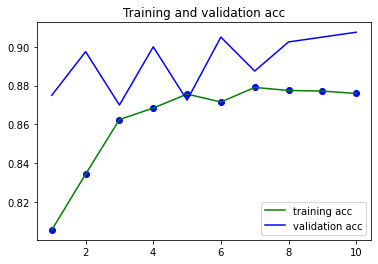

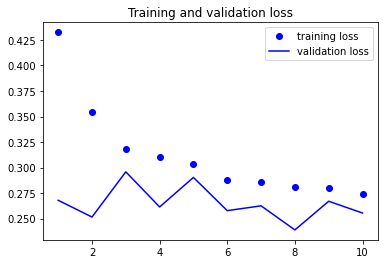

In [140]:
history = vgg_model_un.fit(train_aug,steps_per_epoch=len(train_g),epochs=10,validation_data=vali_g,validation_steps=len(vali_g))
acc = history.history['accuracy']
loss = history.history['loss']
val_acc=history.history['val_accuracy']
val_loss =history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo')
plt.plot(epochs,acc,'b',label='training acc',color="green")
plt.plot(epochs,val_acc,'b',label='validation acc')
plt.title('Training and validation acc')
plt.legend()
plt.show()
plt.plot(epochs,loss,'bo',label='training loss',)
plt.plot(epochs,val_loss,'b',label='validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()